#### This notebook demonstrates the use of Singular Value Decomposition which a useful technique for data reduction and dimensionality reduction. The results of a high dimensional matrix input is 3 matrices capturing the key features of the input.

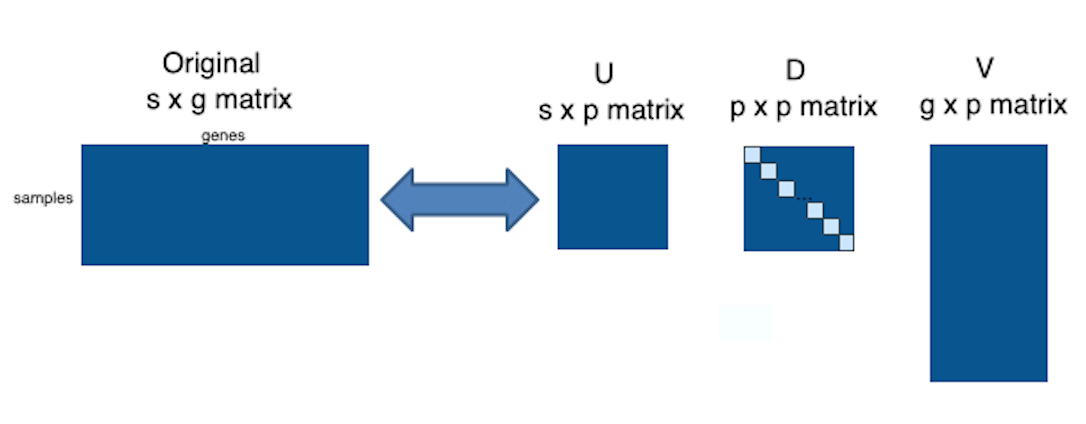

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
img_RGB = imread('husky.png') # RGB image
img_gray = np.mean(img_RGB, -1) # convert to grayscale by aggregating the three layers of the image (RGB)

In [5]:
img_gray.shape

(1102, 735)

In [6]:
# plt.axis('off')
# plt.show(plt.imshow(img_RGB));

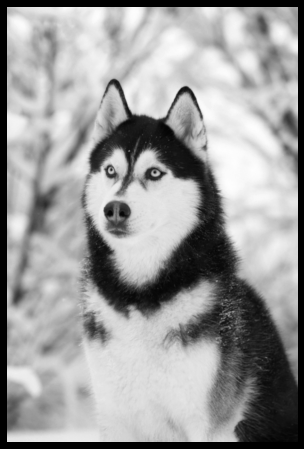

In [7]:
img = plt.imshow(img_gray)
img.set_cmap('gray')
plt.axis('off')
plt.show();

In [8]:
U, S, VT = np.linalg.svd(img_gray, full_matrices=True) # full SVD
S = np.diag(S)
print('U shape is '   + str(U.shape))
print('S shape is '   + str(S.shape))
print('VT shape is '  + str(VT.shape))

U shape is (1102, 1102)
S shape is (735, 735)
VT shape is (735, 735)


In [9]:
S[:5, :5]

array([[674.9575  ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      , 101.53182 ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,  70.3923  ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,  53.83271 ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,  46.244022]],
      dtype=float32)

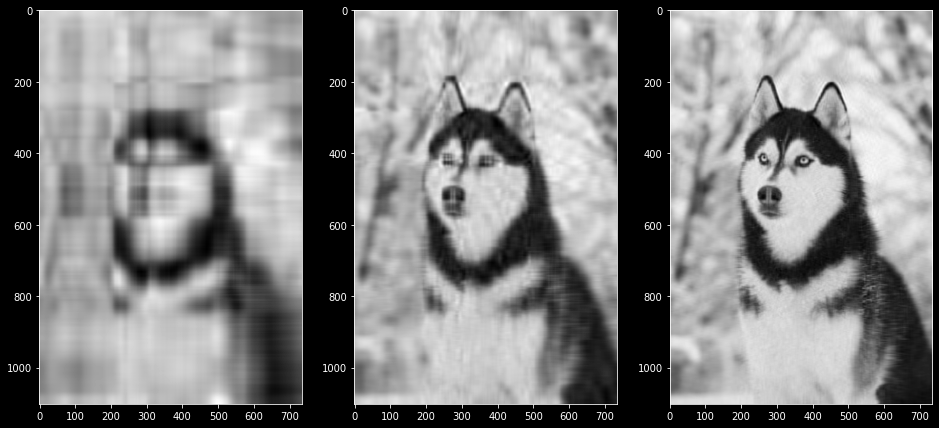

In [10]:
images = []

for r in (5, 20, 50):
    img_approximate = U[:,:r] @ S[:r, :r] @ VT[:r, :]
    images.append(img_approximate)

fig, axes = plt.subplots(1, 3)

axes[0].imshow(images[0]).set_cmap('gray')
axes[1].imshow(images[1]).set_cmap('gray')
axes[2].imshow(images[2]).set_cmap('gray')

plt.show();

In [11]:
# img = plt.imshow(images[2])
# img.set_cmap('gray')
# plt.axis('off')
# plt.show();

In [12]:
# img.save('gray_huski.png')

In [14]:
# plt.savefig('husky_gray.png')
# plt.imsave('test.png', images[2])

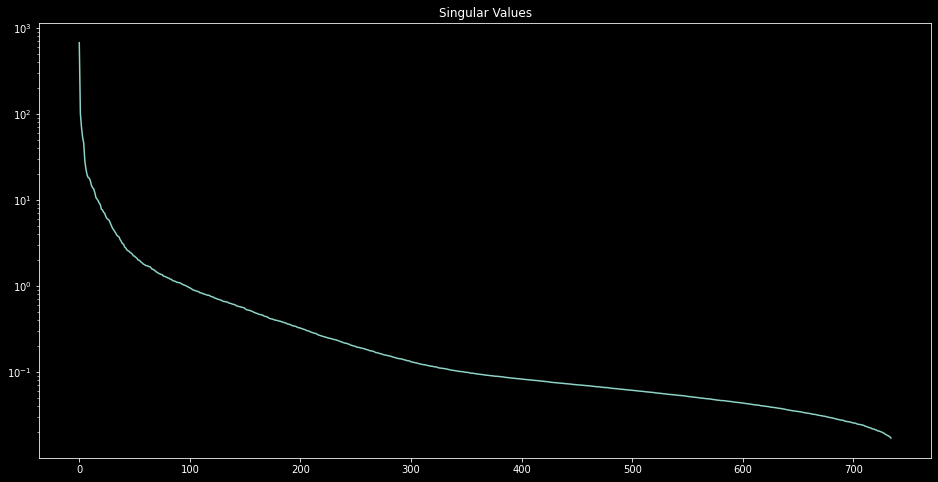

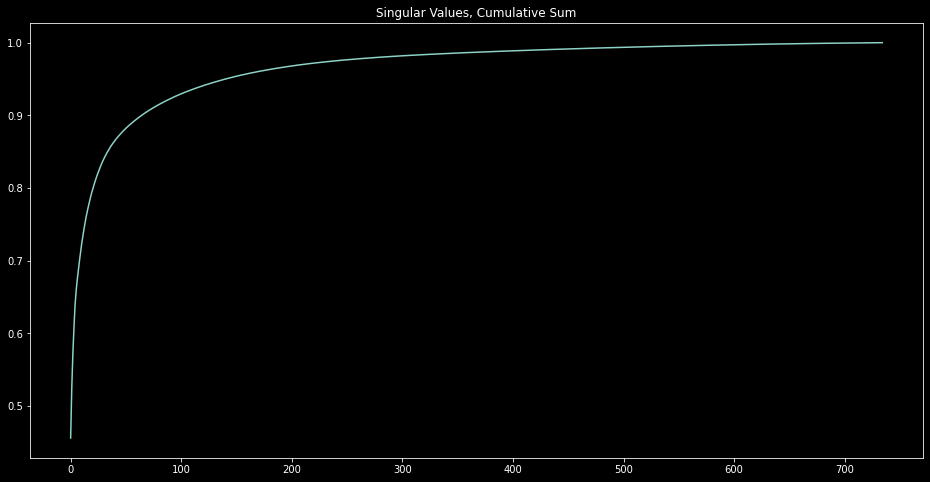

In [15]:
# ploting the singular values
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Singular Values, Cumulative Sum')
plt.show()